Iteration: 1 | Error: 99923.17048612899
Iteration: 2 | Error: 925.3119790158394
Iteration: 3 | Error: 1529.0848569690318
Iteration: 4 | Error: 2102.5491762323722
Iteration: 5 | Error: 16182.958598572064
Iteration: 6 | Error: 20256.121628595458
Iteration: 7 | Error: 20469.11864661868
Iteration: 8 | Error: 36840.36294515153
Iteration: 9 | Error: 74488.99018925193
Iteration: 10 | Error: 475077.8895709731
Iteration: 11 | Error: 474274.4804260862
Iteration: 12 | Error: 126035.10300622463
Iteration: 13 | Error: 439855.42034720484
Iteration: 14 | Error: 413542.86479701183
Iteration: 15 | Error: 174430.32728056313
Iteration: 16 | Error: 175512.08433302245
Iteration: 17 | Error: 36137.235555355874
Iteration: 18 | Error: 16077.468192072025
Iteration: 19 | Error: 64579.25529359536
Iteration: 20 | Error: 27002.178539720302
Iteration: 21 | Error: 47263.35833748245
Iteration: 22 | Error: 48006.86353532474
Iteration: 23 | Error: 14662.305435082617
Iteration: 24 | Error: 62802.9636852237
Iteration: 25

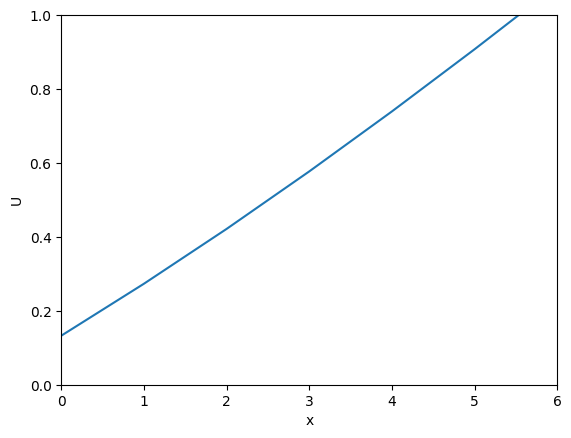

In [1]:
import numpy as np
import matplotlib.pyplot as mplot
from scipy.optimize import fsolve

#define constants
n = 100
h = 1/n

def F(U):
    f = np.zeros_like(U)

    f[0] = (U[1] - 2 * U[0]) / h**2 - 80 * np.cos(U[0])
    for i in range(1, n - 1):
        f[i] = (U[i+1] - 2 * U[i] + U[i-1]) / h**2 - 80 * np.cos(U[i])
    f[n-1] = (10 - 2 * U[n-1] + U[n-2]) / h**2 - 80 * np.cos(U[n-1])

    #print(f)
    return f

def Jacobian(U):
    J = np.zeros((n, n))

    J[0, 0] = -2 / h**2 + 80 * np.sin(U[0])
    J[0, 1] = 1 / h**2

    for i in range(1, n - 1):
        J[i, i-1] = 1 / h**2
        J[i, i] = -2 / h**2 + 80 * np.sin(U[i])
        J[i, i+1] = 1 / h**2

    J[n-1, n-2] = 1 / h**2
    J[n-1, n-1] = -2 / h**2 + 80 * np.sin(U[n-1])

    return J

initial = np.zeros(n)
tolerance = 1e-10

current = initial
function = F(current)
error = np.linalg.norm(function)
iterator = 1

while error > tolerance:
    print("Iteration: {} | Error: {}".format(iterator, error))
    current -= np.linalg.solve(Jacobian(current), function)
    function = F(current)
    error = np.linalg.norm(function)
    iterator += 1

print("Final: ")
print(current)
print("U_50 = {}".format(round(current[49], 3)))

mplot.plot(current)
mplot.ylim([0, 1])
mplot.xlim([0, 6])
mplot.xlabel("x")
mplot.ylabel("U")
mplot.show()


# solution = fsolve(F, initial, fprime=Jacobian)
# print(solution)